# Data Visualization Project: Indian Power Sector at a Glance
   > ### By Nikhil Thosar (224161020)

##### Note: Change the paths to the csv files before running the codes

### Data Cleaning
>   Data consistency is essential for accurate analysis and decision-making. When dealing with data on power generation in India, it is important to ensure that the state names are spelled correctly, and there are no duplications or discrepancies in the names. For example, 'Andhra Pradesh' and 'Andhra Pradesh.' may be the same state but with slightly different names. This inconsistency can lead to errors in analysis and should be corrected.

>In addition to spelling correction and removal of duplication in state names, data consistency may also involve handling newly formed or combined states or union territories (UTs). For example, in recent years, Telangana was formed by splitting Andhra Pradesh, and Jammu and Kashmir was split into two UTs. This change in the political boundaries of states and UTs requires updating the data to ensure that it is consistent with the current geographic division of the country.

>Another challenge in dealing with power generation data is handling NaN values or missing data. NaN values can occur when data is not available or is incomplete. In the case of power generation data, it could be due to a power plant being shut down for maintenance, or due to a delay in data reporting. In such cases, it may be necessary to interpolate the data to estimate the missing values based on available data points. Interpolation can help fill in gaps in the data and make it more consistent, allowing for more accurate analysis.

>In particular, the Power_Generation.csv file may have missing data that requires interpolation to estimate the power generation during those periods accurately. Interpolation techniques such as linear interpolation, cubic interpolation, or spline interpolation can be used to fill in missing values.

In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the power generation capacity file
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df.head()  

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88


In [3]:
#converting 'month-year' format to 'month' and 'year' two columns for convinience in plotting.
df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total,year,Month,Year
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40,2019,Jan,2019
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61,2019,Jan,2019
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58,2019,Jan,2019
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52,2019,Jan,2019
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88,2019,Jan,2019


> Given statewise generation capacity data have some discrepancy due to administrative changes for geographical regions. 
   Eg. Daman & Diu and "Dadra & Nagar Haveli" merged to one UT. So I summed up the capacity throughout the period to show a        consistent data trend, otherwise it would have created confusion while interpreting the plot. 

In [4]:
df_diu = df[df["state"] == "Daman & Diu"]
df_dnh = df[df["state"] == "Dadra & Nagar Haveli"]

df_diu_sum = df_diu.groupby(["month", "Year", "region"]).sum()
df_dnh_sum = df_dnh.groupby(["month", "Year", "region"]).sum()

df_combined = df_diu_sum.add(df_dnh_sum, fill_value=0)
 
df_combined["state"] = "Dadra and Nagar Haveli and Dam"

df_combined.reset_index(inplace=True)
df_combined.drop('year', axis=1, inplace=True)
df_combined = df_combined[['id', 'month', 'region', 'state', 'coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']]
df_combined.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,251,Apr-2019,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,19.93,19.93
1,1123,Apr-2020,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,25.32,25.32
2,2011,Apr-2021,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,46.01,46.01
3,539,Aug-2019,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,20.91,20.91
4,1419,Aug-2020,Western,Dadra and Nagar Haveli and Dam,0.0,0.0,0.0,0.0,0.0,0.0,32.24,32.24


In [22]:
#reading data file
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")

In [5]:
df = df.drop(df[(df['state'] == 'Dadra & Nagar Haveli') | (df['state'] == 'Daman & Diu')].index)
df = pd.concat([df, df_combined])
df.reset_index(drop=True, inplace=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88


In [6]:
df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df["state"].replace("Dadra and Nagar Haveli and Dam", "Dadra Nagar Haveli and Daman and Diu", inplace=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total,year,Month,Year
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40,2019,Jan,2019
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61,2019,Jan,2019
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58,2019,Jan,2019
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52,2019,Jan,2019
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88,2019,Jan,2019


In [7]:
#color palette for bar plots
custom_palette = ['#008080', '#ff9900']

## Plot I: Line Plots - Installed Power Capacity Over the Years (2019-2022)
>> In India, power generation from various energy sources has been growing steadily over the years. To showcase the periodic trend of installed power capacity, five line plots have been generated, each representing one energy source and displaying different colored lines for the five regions of India.
Overall, these line plots demonstrate a positive trend in installed power capacity for various energy sources across different regions in India from 2019 to 2022.

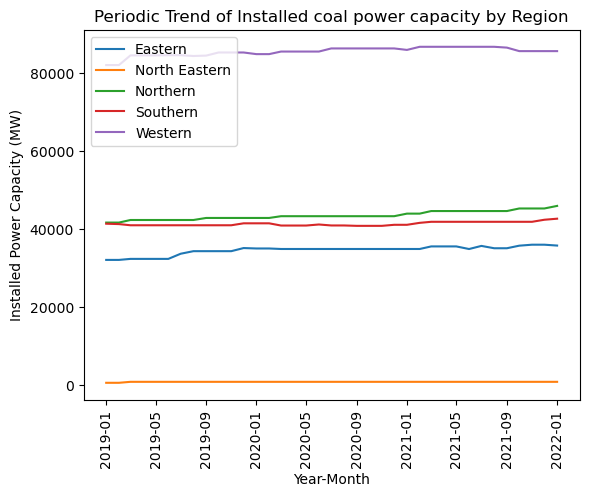

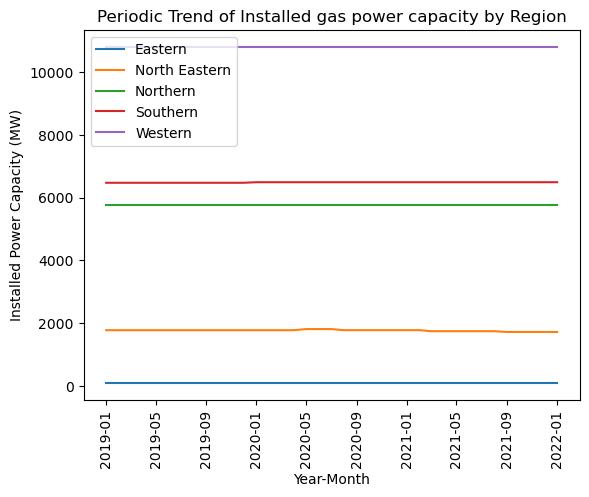

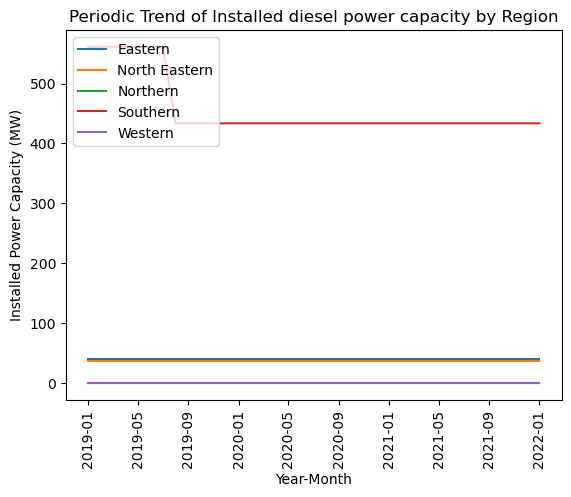

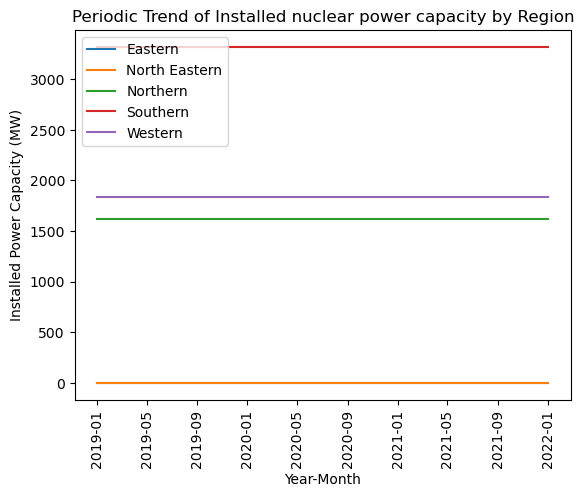

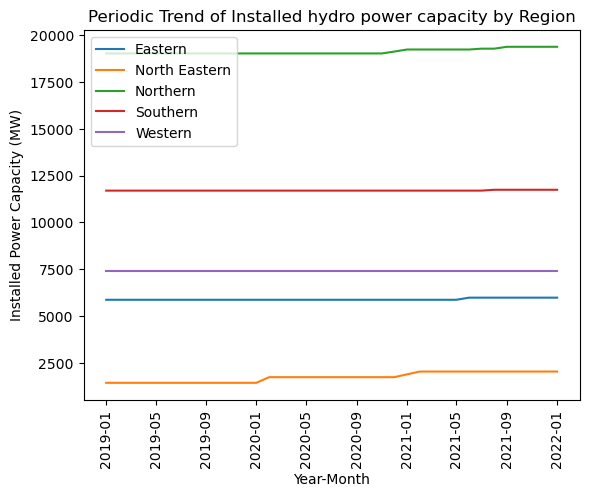

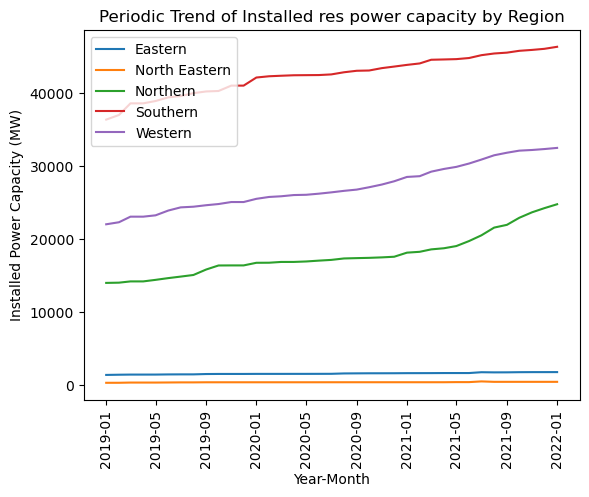

In [8]:
# Convert the 'month' column to a datetime format
df['month'] = pd.to_datetime(df['month'], format='%b-%Y')

# Create a pivot table of the installed power capacity columns with month as the index and source of energy as the columns
sources = ['coal', 'gas', 'diesel', 'nuclear', 'hydro', 'res'] 
for source in sources:
    # Create a pivot table of the grand_total column with month as the index and region as the columns
    df_pivot = df.pivot_table(values=source, index='month', columns='region', aggfunc='sum')

    # Plot each region separately using a loop
    for col in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot[col], label=col)

    # Add labels, legend, and title to the plot
    plt.xlabel('Year-Month')
    plt.ylabel('Installed Power Capacity (MW)')
    plt.xticks(rotation=90)  # Rotate x tick labels by 90 degrees
    plt.legend(loc='upper left')
    plt.title(f'Periodic Trend of Installed {source} power capacity by Region')

    # Display the plot
    plt.show()

## Plot II: Bar Plot
> This bar plot shows the Renewable Energy Capacity added by diffrent states from 2019-2022. Highlighted the bars for top 2 states, that added the maximum capacity.


C:\Users\PC\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_col : Removed 1 rows containing missing values.


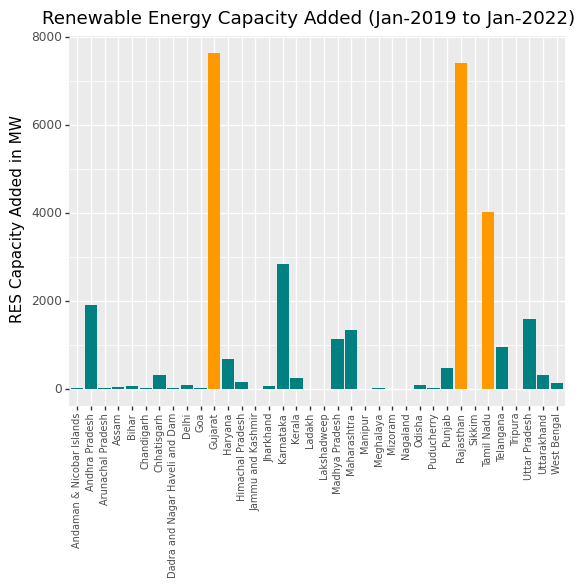

In [9]:
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")


df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df_diu = df[df["state"] == "Daman & Diu"]
df_dnh = df[df["state"] == "Dadra & Nagar Haveli"]

df_diu_sum = df_diu.groupby(["month", "Year", "region"]).sum()
df_dnh_sum = df_dnh.groupby(["month", "Year", "region"]).sum()

df_combined = df_diu_sum.add(df_dnh_sum, fill_value=0)
 
df_combined["state"] = "Dadra and Nagar Haveli and Dam"

df_combined.reset_index(inplace=True)
df_combined.drop('year', axis=1, inplace=True)
df_combined = df_combined[['id', 'month', 'region', 'state', 'coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']]

df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df = df.drop(df[(df['state'] == 'Dadra & Nagar Haveli') | (df['state'] == 'Daman & Diu')].index)
df = pd.concat([df, df_combined])
df.reset_index(drop=True, inplace=True)
df.head()

df_filtered = df[df['month'].isin(['Jan-2019', 'Jan-2022'])]
 
df_pivot = df_filtered.pivot(index='state', columns='month', values='res')
 
df_pivot['RES Capacity Added in MW'] = (df_pivot['Jan-2022'] - df_pivot['Jan-2019'])  
 
df_pivot = df_pivot.reset_index()
 
top_states = df_pivot.sort_values(by='RES Capacity Added in MW', ascending=False)['state'][:3]

increment_plot = (ggplot(df_pivot, aes(x='state', y='RES Capacity Added in MW', fill=df_pivot['state'].isin(top_states)))
                  + geom_col(position=position_dodge(1), width=0.9)
                  + scale_fill_manual(values=[custom_palette[0], custom_palette[1]], guide=False)
                  + labs(x='State / Union territory (UT)', y='RES Capacity Added in MW',
                         title='Renewable Energy Capacity Added (Jan-2019 to Jan-2022)')
                  + theme(axis_text_x=element_text(angle=90, size=7),
                          axis_title_x=element_blank())
                  )

print(increment_plot)

## Plot III: Stacked Bar Plot
>This region-wise facetted plots shows the gradual growth of each energy resource installed power capacity.

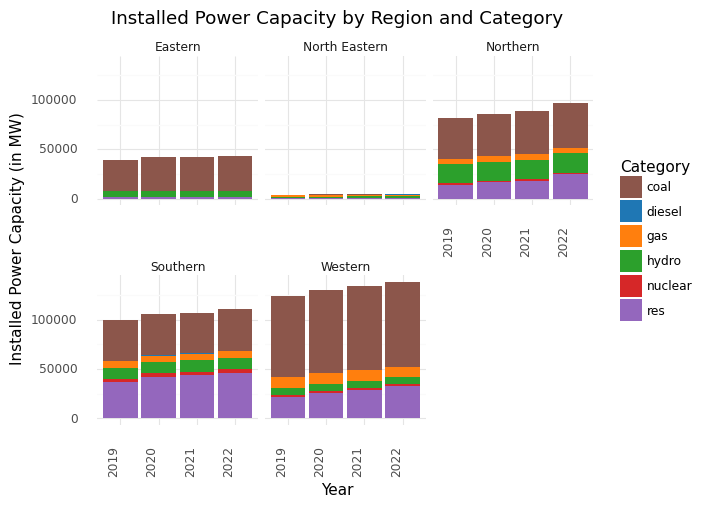

In [10]:
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
# Define the colors for each source
colors = {
    'diesel': 'tab:blue',
    'coal': 'tab:brown',
    'gas': 'tab:orange',
    'hydro': 'tab:green',
    'nuclear': 'tab:red',
    'res': 'tab:purple'
}

# Filter the data to include only January for each year
df_jan = df[df['Month'] == 'Jan']

# Sum the state capacities for each region and year
df_grouped = df_jan.groupby(['region', 'Year']).sum()[['coal', 'gas', 'diesel',  'nuclear', 'hydro', 'res']]
df_grouped = df_grouped.reset_index()

# Melt the DataFrame to a long format
df_melted = pd.melt(df_grouped, id_vars=['region', 'Year'], var_name='Category', value_name='Capacity')

# Create the stacked bar chart
stacked_bar_chart = (ggplot(df_melted, aes(x='Year', y='Capacity', fill='Category'))
                     + geom_bar(stat='identity')
                     + scale_fill_manual(values=colors)  # Use the color mappings
                     + labs(x='Year', y='Installed Power Capacity (in MW)', title='Installed Power Capacity by Region and Category')
                     + theme_minimal()
                     + theme(axis_text_x=element_text(angle=90, hjust=1),panel_spacing_y=0.5)
                     + facet_wrap('~region', ncol=3)
                    )

print(stacked_bar_chart)

## Plot IV: 
> This facetted Heatmap gives the overall idea of trend of increase it capacity throughout years for each state and moreover from colors of heatmap and scale given, comparative study between the regions can be done. We can see the Maharashtra is consistenly have the highest Power Generation Capacity installed. Western region have most developed infrastructure and Northeastern the least.

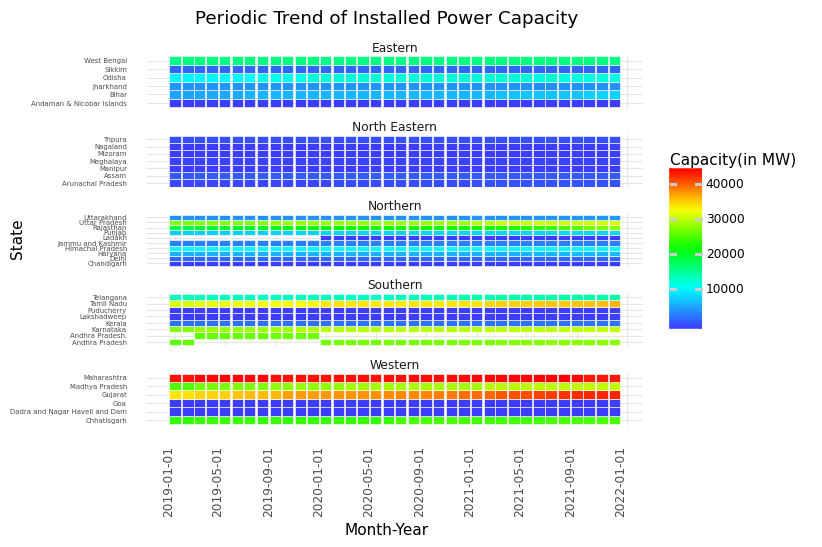

In [18]:
df['year'] = df['month'].str[-4:].astype(int)
df = df[df['year'] <= 2021]
# Convert 'month' column to datetime and sort it in ascending order
df['month_new'] = pd.to_datetime(df['month'], format='%b-%Y')
df = df.sort_values('month_new')

# Group by 'state' and 'month' and calculate the sum of 'grand_total'
df_heatmap = df.groupby(['region', 'state', 'month_new']).sum()['grand_total'].reset_index()

# Melt the DataFrame to a long format
df_heatmap = pd.melt(df_heatmap, id_vars=['region', 'state', 'month_new'], var_name='Category', value_name='Capacity(in MW)')

# Create the heatmap plot with a multi-color gradient and region-wise facets
heatmap_plot = (ggplot(df_heatmap, aes(x='month_new', y='state', fill='Capacity(in MW)'))
                + geom_tile(color='white', size=0.25)
                + scale_fill_gradientn(colors=['#3D3DFF', '#00FFFF', '#00FF00', '#FFFF00', '#FF0000'])
                + labs(x='Month-Year', y='State', title='Periodic Trend of Installed Power Capacity')
                + theme_minimal()
                + theme(axis_text_x=element_text(angle=90, hjust=1),
                        axis_text_y=element_text(size=5))
                + facet_wrap('~region',scales='free_y', ncol=1)
               )


print(heatmap_plot)

## Plot V: Donut Charts
> These are region-wise charts showing the status of latest distribution of energy coming from diffrent sources.
  Observing carefully, we can get interesting insights like, Northeastern India unlike other regions have dominance of Hydro     and Gas generation, whereas other regions show dominance of Conventional Coal Plants. Moreover Southern region have 
  significant percentage of its energy coming from Renewable Resources.

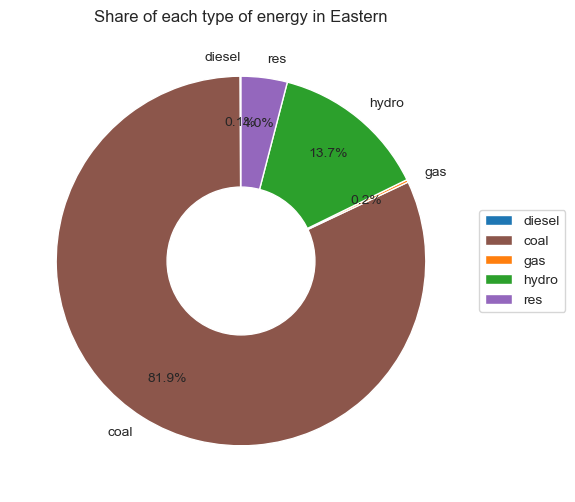

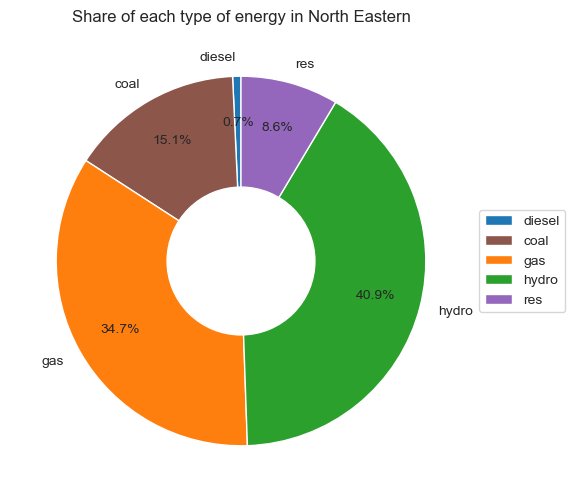

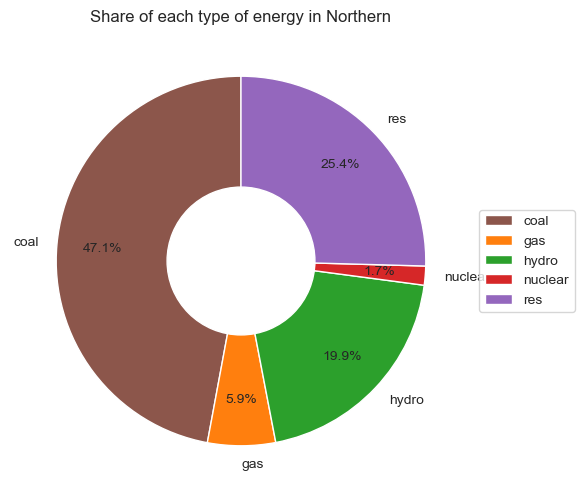

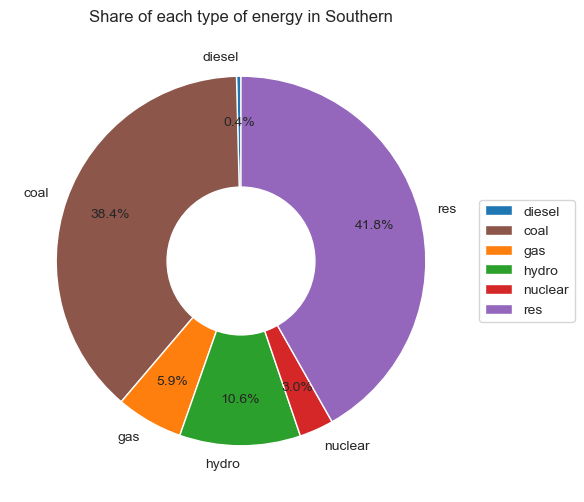

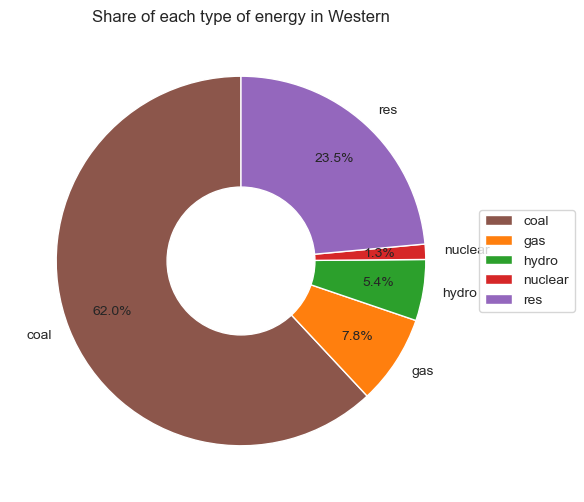

In [100]:
df_jan2022 = df[df['month'].isin(['Jan-2022'])]
df_pie = df_jan2022.groupby('region').sum()[['diesel','coal', 'gas', 'hydro', 'nuclear', 'res', 'grand_total']]
 
df_pie_pct = df_pie.apply(lambda x: x / x['grand_total'] * 100, axis=1)
df_pie_pct.drop('grand_total', axis=1, inplace=True)

inner_radius = 0.4
outer_radius = 1.0

colors = {
    'diesel': 'tab:blue',
    'coal': 'tab:brown',
    'gas': 'tab:orange',
    'hydro': 'tab:green',
    'nuclear': 'tab:red',
    'res': 'tab:purple'
}
 
for state in df_pie_pct.index:
    non_zero_pct = df_pie_pct.loc[state][df_pie_pct.loc[state] != 0.0]
    labels = non_zero_pct.index
    
    if len(labels) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(non_zero_pct, labels=labels, radius=outer_radius, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.75, colors=[colors[source] for source in labels])
    ax.set_title(f'Share of each type of energy in {state}')
    ax.pie([100], radius=inner_radius, colors='w')
    
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

## Plot VI: Donut Charts
> These are region-wise charts showing the status of latest distribution of energy coming from diffrent thermal sources only.

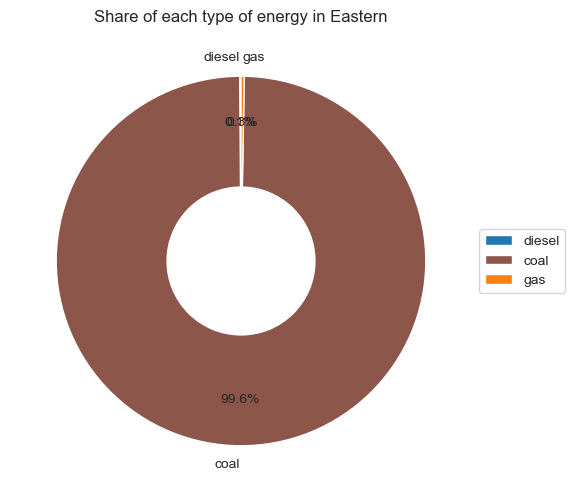

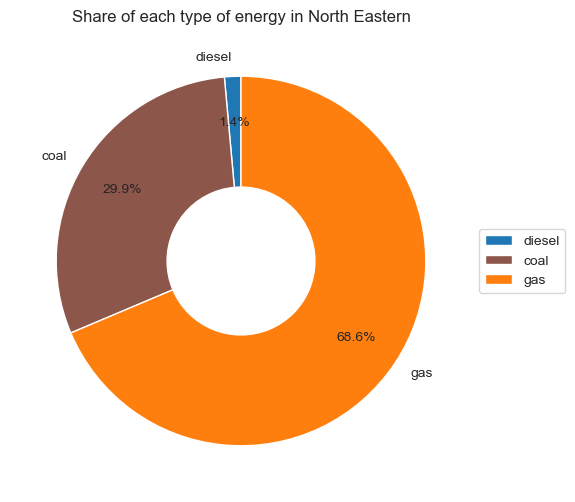

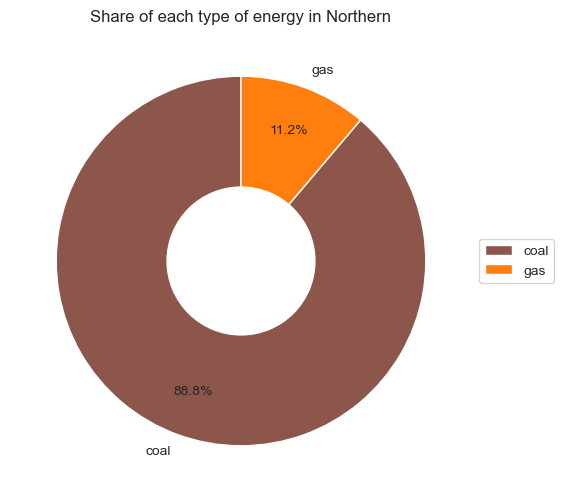

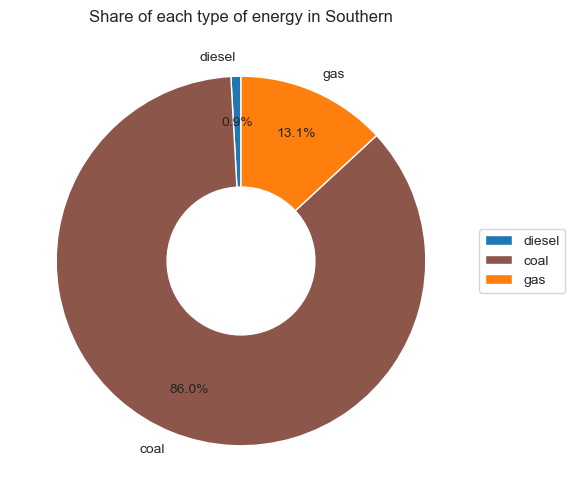

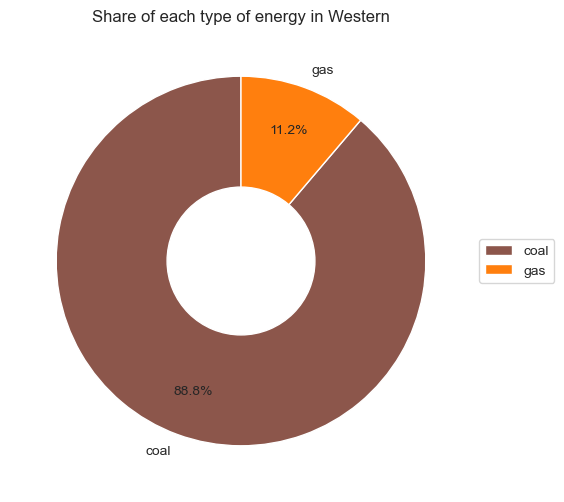

In [83]:
df_pie = df_jan2022.groupby('region').sum()[['diesel','coal', 'gas' , 'thermal_total']]
 
df_pie_pct = df_pie.apply(lambda x: x / x['thermal_total'] * 100, axis=1)
df_pie_pct.drop('thermal_total', axis=1, inplace=True)

inner_radius = 0.4
outer_radius = 1.0

colors = {
    'diesel': 'tab:blue',
    'coal': 'tab:brown',
    'gas': 'tab:orange',
}

for state in df_pie_pct.index:
    non_zero_pct = df_pie_pct.loc[state][df_pie_pct.loc[state] != 0.0]
    labels = non_zero_pct.index
  
    if len(labels) == 0:
        continue
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(non_zero_pct, labels=labels, radius=outer_radius, autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.75, colors=[colors[source] for source in labels])
    ax.set_title(f'Share of each type of energy in {state}')
 
    ax.pie([100], radius=inner_radius, colors='w')
 
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plt.show()

In [102]:
#reading genartion data
data = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Power_Generation.csv")

In [24]:
# Create a dictionary to hold the separate data frames
dfs = {}

# Loop through each region and create a separate data frame for it
for region in data['Region'].unique():
    region_df = data[data['Region'] == region].copy()
    region_df.reset_index(drop=True, inplace=True)
    dfs[region] = region_df

northern_df = dfs['Northern']
western_df = dfs['Western']
southern_df = dfs['Southern']
eastern_df = dfs['Eastern']
northeastern_df = dfs['NorthEastern']

northern_df.fillna(northern_df.mean(), inplace=True)
western_df.fillna(western_df.mean(), inplace=True)
southern_df.fillna(southern_df.mean(), inplace=True)
eastern_df.fillna(eastern_df.mean(), inplace=True)
northeastern_df.fillna(northeastern_df.mean(), inplace=True)
northeastern_df = northeastern_df[['index','Date','Region','Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']]
eastern_df =  eastern_df[['index','Date','Region','Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']]

df = pd.concat([northern_df, western_df, southern_df, eastern_df, northeastern_df])
df.reset_index(drop=True, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9000\3611620112.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\PC\AppData\Local\Temp\ipykernel_9000\3611620112.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\PC\AppData\Local\Temp\ipykernel_9000\3611620112.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\PC\AppData\Local\Temp\ipykernel_9000\3611620112.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is depr

In [25]:
northern_df_new = northern_df[["Date","Region" ,"Thermal Generation Actual (in MU)"]]
northern_df_new = northern_df_new[northern_df_new['Date'].str.startswith('2019')]
northern_df_new["Thermal Generation Actual (in MU)"] = pd.to_numeric(northern_df_new["Thermal Generation Actual (in MU)"])
northern_df_new.head()

,Date,Region,Thermal Generation Actual (in MU)
485,2019-01-01,Northern,691.66
486,2019-01-02,Northern,691.66
487,2019-01-03,Northern,692.52
488,2019-01-04,Northern,692.52
489,2019-01-05,Northern,686.77


In [26]:
import pandas as pd

# Extract month from "Date" column and create a new column for it
northern_df_new['Month'] = pd.to_datetime(northern_df_new['Date']).dt.to_period('M')
northern_df_new

,Date,Region,Thermal Generation Actual (in MU),Month
485,2019-01-01,Northern,691.66,2019-01
486,2019-01-02,Northern,691.66,2019-01
487,2019-01-03,Northern,692.52,2019-01
488,2019-01-04,Northern,692.52,2019-01
489,2019-01-05,Northern,686.77,2019-01
...,...,...,...,...
845,2019-12-27,Northern,685.97,2019-12
846,2019-12-28,Northern,685.97,2019-12
847,2019-12-29,Northern,685.97,2019-12
848,2019-12-30,Northern,685.97,2019-12


In [27]:
# Group data by month and find average thermal generation for each month
northern_df_monthly = northern_df_new.groupby('Month')['Thermal Generation Actual (in MU)'].mean().reset_index()

# Display the resulting dataframe
print(northern_df_monthly)

      Month  Thermal Generation Actual (in MU)
0   2019-01                         676.047097
1   2019-02                         663.731786
2   2019-03                         666.431613
3   2019-04                         692.206000
4   2019-05                         725.139355
5   2019-06                         717.745667
6   2019-07                         645.733871
7   2019-08                         669.701290
8   2019-09                         703.970667
9   2019-10                         710.351935
10  2019-11                         655.826333
11  2019-12                         656.445484


## Plot VII: Line Charts 

In [ ]:
northeastern_df.head()
northeastern_df['Date'] = pd.to_datetime(northeastern_df['Date']) # Convert Date column to datetime format
northeastern_monthly = northeastern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
northeastern_monthly.replace(0, np.nan, inplace=True)
northeastern_monthly.replace(0.00, np.nan, inplace=True)
northeastern_monthly = northeastern_monthly.interpolate(method='backfill')
northeastern_monthly.head()
(ggplot(northeastern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Northeastern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

In [22]:
northern_df.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,5,2017-09-02,Northern,624.23,507.42,30.36,35.69,273.27,317.19
2,10,2017-09-03,Northern,624.23,492.69,30.36,35.65,273.27,316.69
3,15,2017-09-04,Northern,624.23,568.34,30.36,35.62,273.27,297.47
4,20,2017-09-05,Northern,628.58,597.08,30.36,35.72,273.27,290.23


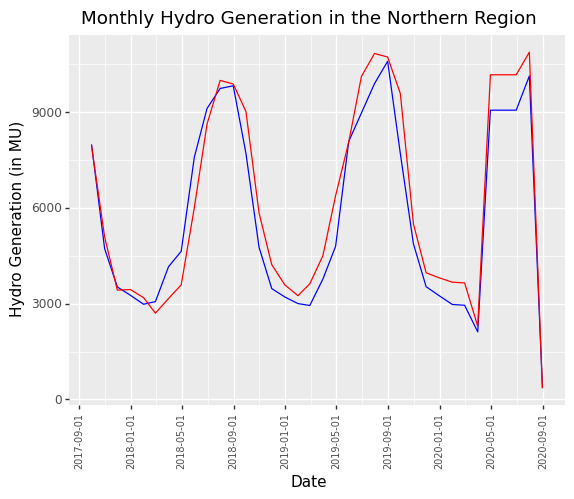

<ggplot: (124160907201)>

In [31]:
northern_df.head()
northern_df['Date'] = pd.to_datetime(northern_df['Date']) # Convert Date column to datetime format
northern_monthly = northern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
northern_monthly.replace(0, np.nan, inplace=True)
northern_monthly.replace(0.00, np.nan, inplace=True)
northern_monthly = northern_monthly.interpolate(method='backfill')
northern_monthly.head()
(ggplot(northern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Northern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

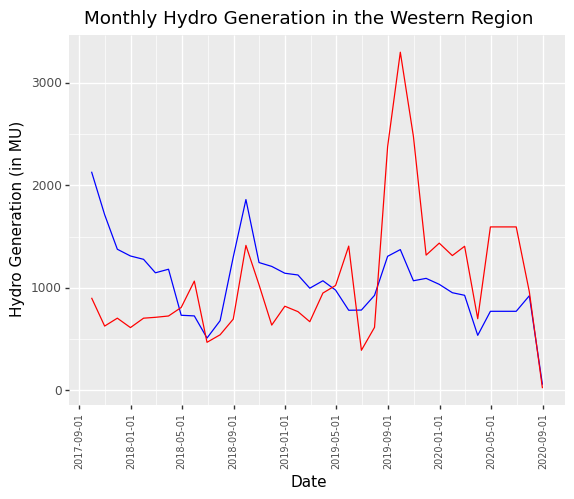

<ggplot: (124160754469)>

In [32]:
western_df.head()
western_df['Date'] = pd.to_datetime(western_df['Date']) # Convert Date column to datetime format
western_monthly = western_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
western_monthly.replace(0, np.nan, inplace=True)
western_monthly.replace(0.00, np.nan, inplace=True)
western_monthly = western_monthly.interpolate(method='backfill')
western_monthly.head()
(ggplot(western_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Western Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

C:\Users\PC\AppData\Local\Temp\ipykernel_9000\1641135932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


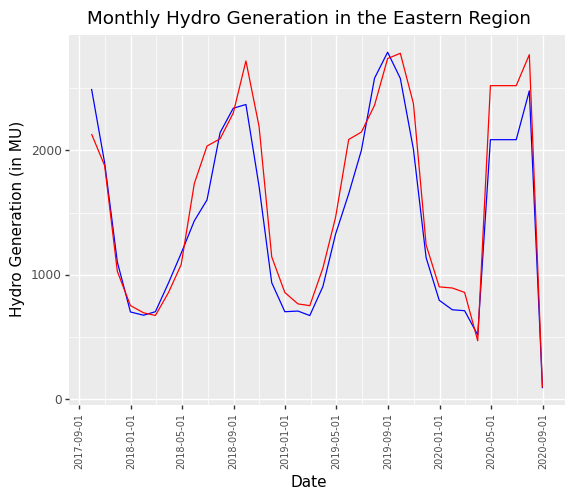

<ggplot: (124161407139)>

In [33]:
eastern_df.head()
eastern_df['Date'] = pd.to_datetime(western_df['Date']) # Convert Date column to datetime format
eastern_monthly = eastern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
eastern_monthly.replace(0, np.nan, inplace=True)
eastern_monthly.replace(0.00, np.nan, inplace=True)
eastern_monthly = eastern_monthly.interpolate(method='backfill')
eastern_monthly.head()
(ggplot(eastern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Eastern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

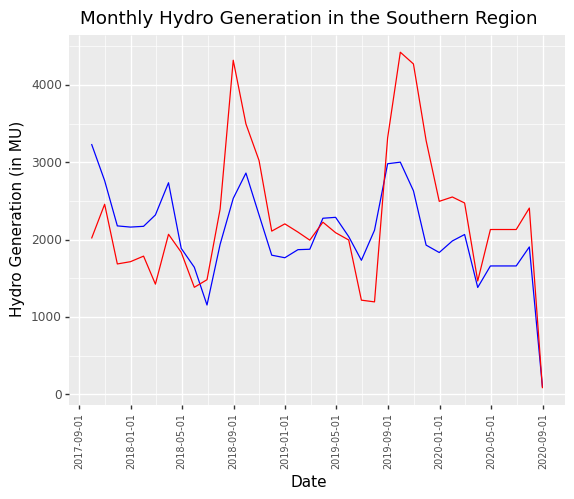

<ggplot: (124161408907)>

In [34]:
southern_df.head()
southern_df['Date'] = pd.to_datetime(western_df['Date']) # Convert Date column to datetime format
southern_monthly = southern_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
southern_monthly.replace(0, np.nan, inplace=True)
southern_monthly.replace(0.00, np.nan, inplace=True)
southern_monthly = southern_monthly.interpolate(method='backfill')
southern_monthly.head()
(ggplot(southern_monthly, aes(x='Date', y='Hydro Generation Actual (in MU)')) + 
  geom_line(color='blue') +
  geom_line(aes(x='Date', y='Hydro Generation Estimated (in MU)'), color='red') +
  labs(title='Monthly Hydro Generation in the Southern Region', x='Date', y='Hydro Generation (in MU)')
 + theme(axis_text_x=element_text(angle=90, size=7) ))

In [35]:
northern_monthly['Year'] = northern_monthly['Date'].dt.year

In [36]:
northern_monthly.head()

,Date,index,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Year
0,2017-09-30,2175.0,880.44,955.82,7993.64,7946.24,2017
1,2017-10-31,6675.0,774.00,1087.77,4723.80,5087.98,2017
2,2017-11-30,11175.0,594.00,1109.62,3525.00,3424.77,2017
3,2017-12-31,16275.0,889.60,1088.86,3262.13,3443.43,2017
4,2018-01-31,21080.0,939.61,996.00,2981.58,3189.30,2018


### >> GEOGRAPHICAL PLOTS

In [ ]:
pip install pyshp

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp

In [38]:
from shapely.geometry import Point
sns.set_style('whitegrid')

In [39]:
fp = r'C:/Users/PC/Desktop/Work/DVProject/Maps_with_python-master/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


<AxesSubplot:>

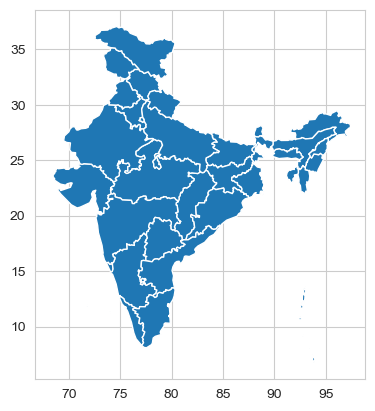

In [40]:
map_df.plot()

In [41]:
df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df['year'] = df['month'].str[-4:].astype(int)
df['state'] = df['state'].replace({'Andhra Pradesh.': 'Andhra Pradesh'})
df[['Month', 'Year']] = df['month'].str.split('-', n=1, expand=True)
df_diu = df[df["state"] == "Daman & Diu"]
df_dnh = df[df["state"] == "Dadra & Nagar Haveli"]

df_diu_sum = df_diu.groupby(["month", "Year", "region"]).sum()
df_dnh_sum = df_dnh.groupby(["month", "Year", "region"]).sum()

df_combined = df_diu_sum.add(df_dnh_sum, fill_value=0)
 
df_combined["state"] = "Dadra and Nagar Haveli and Dam"

df_combined.reset_index(inplace=True)
df_combined.drop('year', axis=1, inplace=True)
df_combined = df_combined[['id', 'month', 'region', 'state', 'coal', 'gas', 'diesel', 'thermal_total', 'nuclear', 'hydro', 'res', 'grand_total']]

df = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Installed_Power_Capacity_State_wise_MW.csv")
df = df.drop(df[(df['state'] == 'Dadra & Nagar Haveli') | (df['state'] == 'Daman & Diu')].index)
df = pd.concat([df, df_combined])
df.reset_index(drop=True, inplace=True)
df.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
0,1,Jan-2019,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,32.40,32.40
1,2,Jan-2019,Northern,Delhi,135.0,2208.40,0.0,2343.40,0.0,0.00,176.21,2519.61
2,3,Jan-2019,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,411.99,6383.58
3,4,Jan-2019,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,864.50,10673.52
4,5,Jan-2019,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3449.00,188.88,3812.88


In [42]:
df_jan2022 = df[df['month'].isin(['Jan-2022'])]
df_jan2022.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
1251,1426,Jan-2022,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,53.45,53.45
1252,1427,Jan-2022,Northern,Delhi,0.0,2208.40,0.0,2208.40,0.0,0.00,263.12,2471.52
1253,1428,Jan-2022,Northern,Haryana,5330.0,431.59,0.0,5761.59,0.0,0.00,1086.88,6848.47
1254,1429,Jan-2022,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,10065.02,1031.82,11096.84
1255,1430,Jan-2022,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3360.00,191.55,3726.55


In [44]:
df_new = df_jan2022[['state','grand_total']]
df_res = df_jan2022[['state','res']]
df_res.head()

,state,res
1251,Chandigarh,53.45
1252,Delhi,263.12
1253,Haryana,1086.88
1254,Himachal Pradesh,1031.82
1255,Jammu and Kashmir,191.55


In [24]:
df_6 = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/Potential.csv")
df_6 = df_6[['state','Total']]
df_6.head()

,state,Total
0,Andaman & Nicobar,15
1,Andhra Pradesh,84079
2,Arunachal Pradesh,10723
3,Assam,14182
4,Bihar,12719


In [46]:
df_new["state"].replace("Chhatisgarh", "Chhattisgarh",inplace = True)
df_new["state"].replace("Dadra and Nagar Haveli and Dam", "Dadra and Nagar Haveli",inplace = True)

df_res["state"].replace("Chhatisgarh", "Chhattisgarh",inplace = True)
df_res["state"].replace("Dadra and Nagar Haveli and Dam", "Dadra and Nagar Haveli",inplace = True)

df_6["state"].replace("Chhatisgarh", "Chhattisgarh",inplace = True)
df_6["state"].replace("Dadra and Nagar Haveli and Dam", "Dadra and Nagar Haveli",inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9000\634403927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PC\AppData\Local\Temp\ipykernel_9000\634403927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PC\AppData\Local\Temp\ipykernel_9000\634403927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PC\AppData\Local\Temp\ipykernel_9000\634403927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [48]:
#Merging the data
merged = map_df.set_index('st_nm').join(df_new.set_index('state'))
merged['grand_total'] = merged['grand_total'].replace(np.nan, 0)

#Merging the data
merged_res = map_df.set_index('st_nm').join(df_res.set_index('state'))
merged_res['res'] = merged_res['res'].replace(np.nan, 0)

#Merging the data
merged_6= map_df.set_index('st_nm').join(df_6.set_index('state'))
merged_6['Total'] = merged_6['Total'].replace(np.nan, 0)

## Plot VIII: Choropleth Map - India Total Installed Power Capacity

<AxesSubplot:title={'center':'Installed Power Capacity in India state-wise'}>

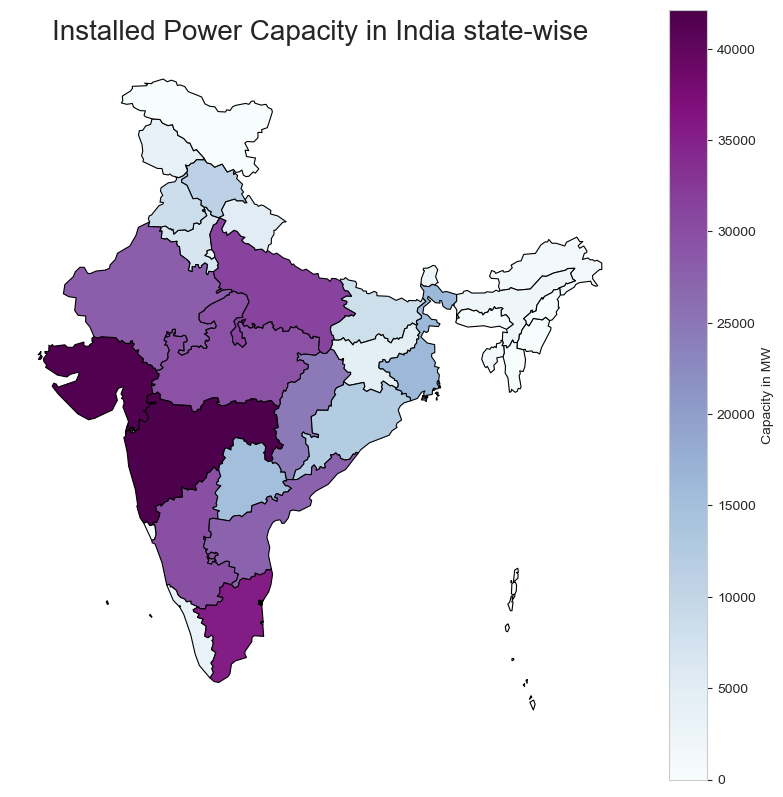

In [114]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Installed Power Capacity in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column='grand_total', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0', legend=True, markersize=[39.739192, -104.990337], legend_kwds={'label': "Capacity in MW"})

## Plot IX: Choropleth Map - Installed Capacity State-wise
> A choropleth map is an effective way to visualize the distribution of data across geographic regions. A choropleth map showing the power installed capacity in India for the year 2022 would provide valuable insights into the regional distribution of power generation.

>The map would display the power installed capacity data for each state of India, with varying shades of colors indicating the level of installed capacity. The darker shades would represent higher installed capacity, while the lighter shades would represent lower installed capacity.

>Some of the states that would be highlighted with the highest installed capacity include Maharashtra, Tamil Nadu, Gujarat, and Rajasthan. These states have invested significantly in renewable energy sources such as wind and solar power plants. On the other hand, states such as Bihar, Jharkhand, and Chhattisgarh would display lower installed capacity due to several factors, including a lack of resources and limited infrastructure.

>Overall, the choropleth map would provide a clear visual representation of the power installed capacity across different states of India, indicating which regions are leading the way in power generation and which regions require more investment in the future.

<AxesSubplot:title={'center':'Installed RES Power Capacity in India state-wise'}>

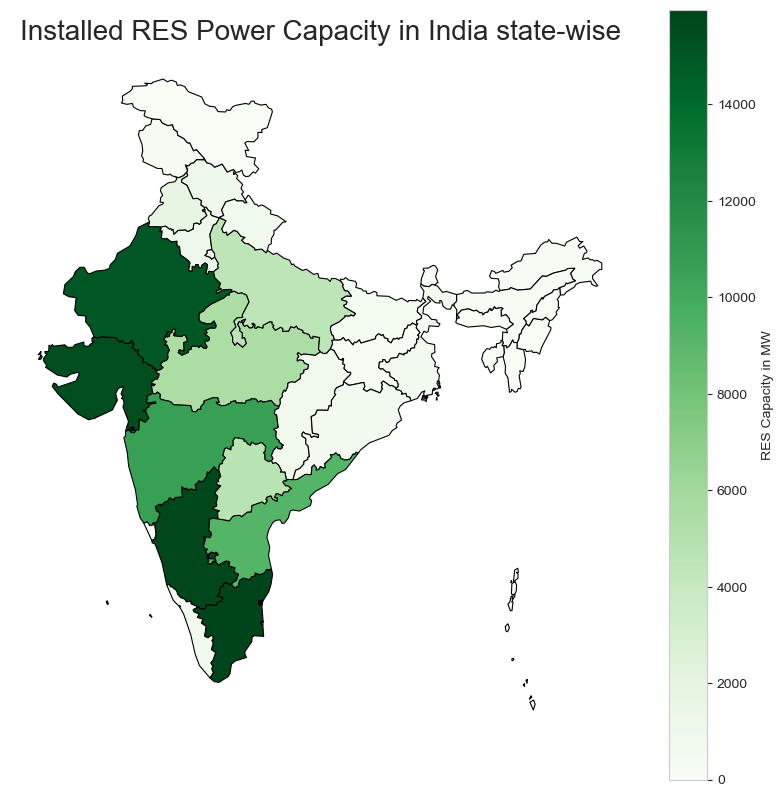

In [49]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Installed RES Power Capacity in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_res.plot(column='res', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0', legend=True, markersize=[39.739192, -104.990337], legend_kwds={'label': "RES Capacity in MW"})

## Plot X: Line Charts - India Estimated Power Potential State-wise
> Comparing two choropleth maps side by side can provide valuable insights into the current state of power generation in India. One map displays the potential of each state for power generation, while the other shows the current installed capacity of each state.

>The potential map would highlight the renewable energy resources available in each state, such as solar, wind, and hydropower potential. States such as Rajasthan, Gujarat, and Tamil Nadu would show high potential due to their abundant solar and wind resources, while states such as Jharkhand and Bihar would show lower potential due to their lack of these resources.
 
>Comparing the two maps side by side would reveal that some states with high potential have not yet fully tapped into their renewable energy resources. At the same time, some states with lower potential have made significant progress in developing their renewable energy infrastructure. This comparison could help policymakers and investors identify opportunities for further investment in renewable energy projects in the states with the highest potential and provide support for those states with lower potential that require assistance to increase their installed capacity.

>Overall, comparing the potential and installed capacity choropleth maps side by side can provide a comprehensive understanding of the current state of power generation in India and inform decision-making processes for future investment in renewable energy projects.

<AxesSubplot:title={'center':'RES Power Potential in India state-wise'}>

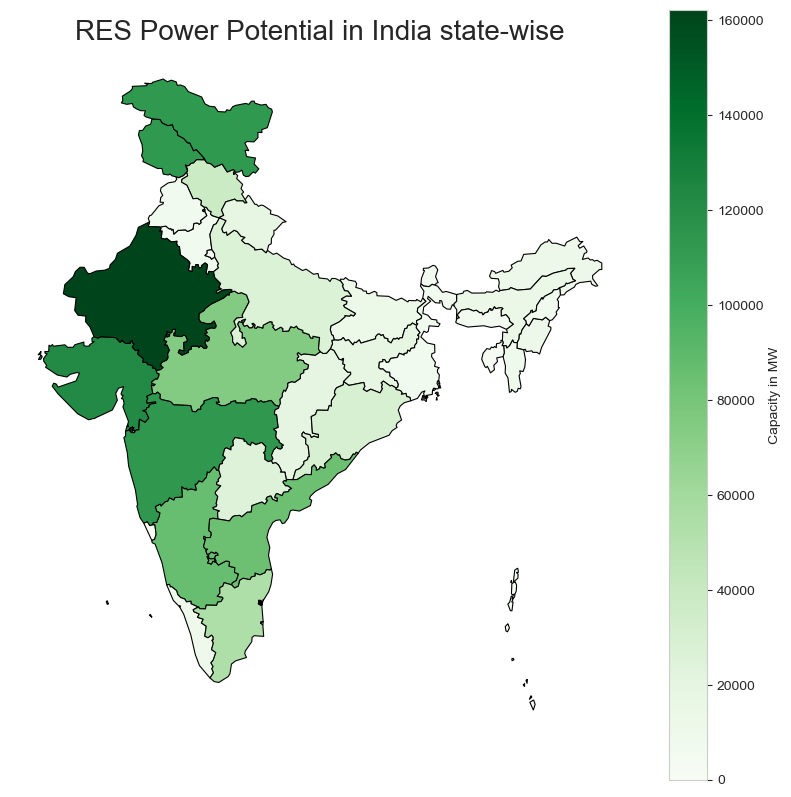

In [115]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('RES Power Potential in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged_6.plot(column='Total', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0', legend=True, markersize=[39.739192, -104.990337], legend_kwds={'label': "Capacity in MW"})

In [51]:
df_3 = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/target.csv")

In [52]:
df_3.head()

,State,Installed as of December 2022,Target,% progress
0,India (total),120848.29,174534,69.24
1,Andaman & Nicobar,35.16,27,130.22
2,Andhra Pradesh,9349.52,18477,50.60
3,Arunachal Pradesh,144.63,539,26.83
4,Assam,184.03,688,26.75


## Plot XI: Bar Plot - Progress in Renewable Energy Sector
>A bar plot showing the percentage target achieved by each state can provide a quick overview of how each state is performing in terms of power generation. In addition, highlighting the states that have outperformed their targets with an orange bar can help to identify the most successful states and areas that may require further investment and support.

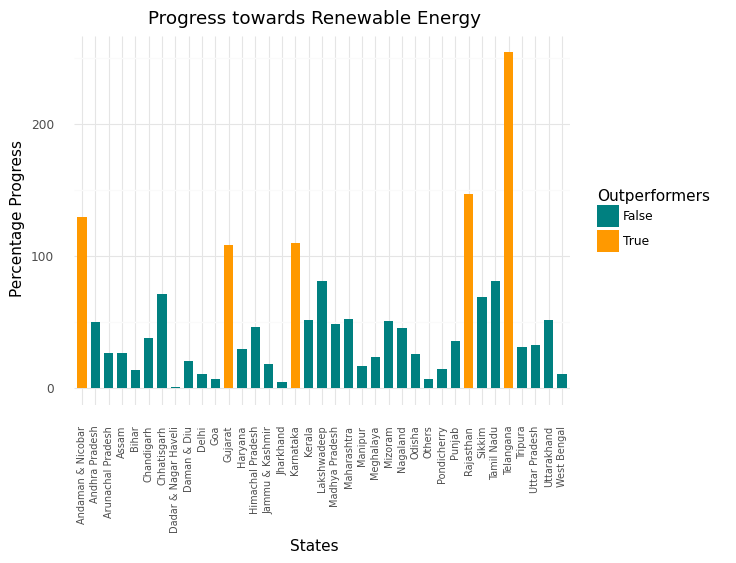

In [53]:
df_2 = df_3[['State', '% progress']]
df_2 = df_2[df_2['State'] != 'India (total)'] 
melted_df_2 = df_2.melt(id_vars='State', var_name='Metric', value_name='Value')
melted_df_2['Highlight'] = melted_df_2['Value'] > 100
bar_plot = (ggplot(melted_df_2, aes(x='State', y='Value', fill='Highlight'))
            + geom_bar(stat='identity', position='dodge', width=0.7)
            + scale_fill_manual(values={True: custom_palette[1], False: custom_palette[0]})
            + labs(title='Progress towards Renewable Energy', x='States', y='Percentage Progress', fill='Outperformers')
            + theme_minimal()
            + theme(legend_position='right', axis_text_x=element_text(angle=90, size=7))
           )
print(bar_plot)


## Plot XII: Bar Plot - Installed Capacity Vs State Target
> A dodged bar plot is an excellent way to visualize the progress of different states in achieving their target for installed power capacity. The plot would display two bars side by side for each state, one representing the target set by the administration, and the other representing the actual installed capacity achieved by the state.

>The plot would reveal the progress of each state in meeting its target and highlight the states that have exceeded their targets. States such as Tamil Nadu, Gujarat, and Maharashtra would display bars showing that they have surpassed their targets by a significant margin. On the other hand, states such as Jharkhand, Chhattisgarh, and Bihar would display bars indicating that they have fallen short of their targets.

>Overall, a dodged bar plot showing the target given by the administration and the installed capacity achieved by each state would provide valuable insights into the progress of power generation in different states and help inform decision-making processes for future investment in the sector.

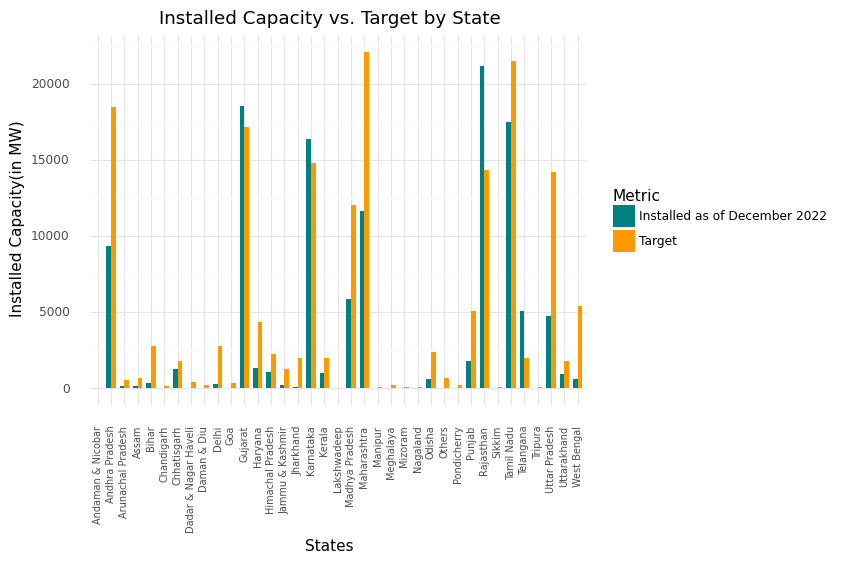

In [54]:
df_4 = df_3[['State','Installed as of December 2022','Target']]
df_4 = df_4[df_4['State'] != 'India (total)'] 
melted_df_4 = df_4.melt(id_vars='State', var_name='Metric', value_name='Value')
 

bar_plot = (ggplot(melted_df_4, aes(x='State', y='Value', fill='Metric'))
            + geom_bar(stat='identity', position='dodge', width=0.7)
            + scale_fill_manual(values=custom_palette)
            + labs(title='Installed Capacity vs. Target by State', x='States', y='Installed Capacity(in MW)', fill='Metric')
            + theme_minimal()
            + theme(legend_position='right', axis_text_x=element_text(angle=90, size=7))
           )
print(bar_plot)

In [81]:
df_5 = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/GDP_data_statewise.csv")

In [82]:
df_5.head()

,Rank,state,GDP in Indian Rupees (Lakh),GDP in US Dollars (Billion),NSDP in Indian Rupees (Lakh),NSDP in US Dollars (Billion)
0,33,Andaman and Nicobar Islands,"9,71,923",1.2,"8,70,221",1.1
1,8,Andhra Pradesh,"9,71,22,422",120.0,"8,70,06,430",110.0
2,31,Arunachal Pradesh,"28,04,613",3.5,"25,64,801",3.2
3,18,Assam,"3,35,23,811",42.0,"2,99,56,920",38.0
4,14,Bihar,"5,94,01,640",74.0,"5,43,37,663",68.0


In [109]:
df_6 = df_5[["state", "GDP in Indian Rupees (Lakh)"]]
df_6.head()

,state,GDP in Indian Rupees (Lakh)
0,Andaman and Nicobar Islands,"9,71,923"
1,Andhra Pradesh,"9,71,22,422"
2,Arunachal Pradesh,"28,04,613"
3,Assam,"3,35,23,811"
4,Bihar,"5,94,01,640"


In [110]:
df_jan2020 = df[df['month'].isin(['Jan-2020'])]
df_jan2020.head()

,id,month,region,state,coal,gas,diesel,thermal_total,nuclear,hydro,res,grand_total
408,433,Jan-2020,Northern,Chandigarh,0.0,0.00,0.0,0.00,0.0,0.00,36.99,36.99
409,434,Jan-2020,Northern,Delhi,0.0,2208.40,0.0,2208.40,0.0,0.00,208.12,2416.52
410,435,Jan-2020,Northern,Haryana,5540.0,431.59,0.0,5971.59,0.0,0.00,531.30,6502.89
411,436,Jan-2020,Northern,Himachal Pradesh,0.0,0.00,0.0,0.00,0.0,9809.02,951.64,10760.66
412,437,Jan-2020,Northern,Jammu and Kashmir,0.0,175.00,0.0,175.00,0.0,3360.00,199.78,3734.78


In [111]:
df_jan2020 = df_jan2020[['state','grand_total']]
df_jan2020.head()

,state,grand_total
408,Chandigarh,36.99
409,Delhi,2416.52
410,Haryana,6502.89
411,Himachal Pradesh,10760.66
412,Jammu and Kashmir,3734.78


In [113]:
merged_df = pd.merge(df_6, df_jan2020, on='state')
merged_df['GDP in Indian Rupees (Lakh)'] = pd.to_numeric(merged_df['GDP in Indian Rupees (Lakh)'].str.replace(',', ''))
merged_df = merged_df.nlargest(15, 'grand_total')
merged_df.head()

,state,GDP in Indian Rupees (Lakh),grand_total
15,Maharashtra,281855457,42195.54
7,Gujarat,163024012,36605.53
25,Tamil Nadu,179722872,33222.38
12,Karnataka,162892793,29222.76
28,Uttar Pradesh,168781799,28079.45


In [91]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 15 to 8
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        15 non-null     object 
 1   GDP in Indian Rupees (Lakh)  15 non-null     int64  
 2   grand_total                  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.0+ bytes


In [114]:
merged_df['GDP in Indian Rupees (Lakh)'] = merged_df['GDP in Indian Rupees (Lakh)'].astype(float)
merged_df['grand_total'] = merged_df['grand_total'].astype(float)

## Plot XIII: Scatter Plot to show a positive correlation between GDP and Installed Power Capacity
> A scatter plot can be used to visualize the relationship between installed capacity and GDP of states in India. A positive correlation between the two variables suggests that as the installed capacity increases, so does the GDP.

>The plot would display each state as a point with the installed capacity on the y-axis and GDP on the x-axis. The size of the point would represent the population of the state, and each point would be color-coded according to the region of the country in which it is located.

>A positive correlation between installed capacity and GDP would be evident if the points on the scatter plot tend to cluster around a line that slopes upward from left to right. A line of best fit could be drawn to visualize this trend, making it easy to see how the two variables are related.

C:\Users\PC\anaconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'size' aesthetic. Make sure you have mapped a variable to it


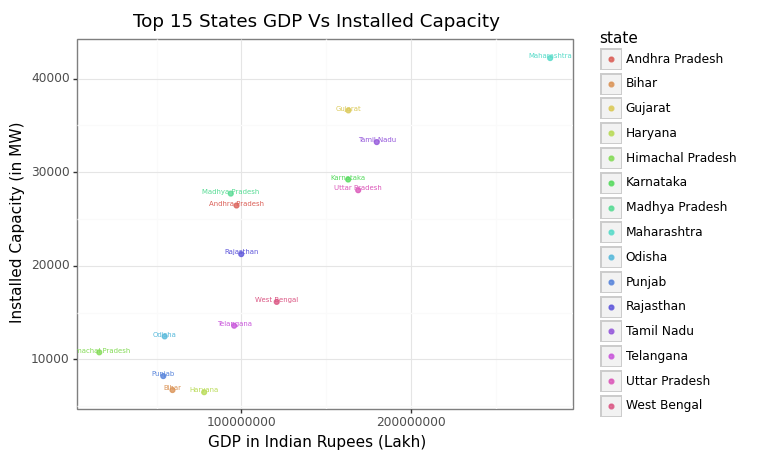

<ggplot: (124160913186)>

In [93]:
from plotnine import *
ggplot(merged_df, aes(x='GDP in Indian Rupees (Lakh)', y='grand_total',  color='state')) \
    + geom_point(alpha=0.8) \
    + geom_text(aes(label='state'), size=5, nudge_x=20000, nudge_y=200) \
    + labs(title='Top 15 States GDP Vs Installed Capacity', x='GDP in Indian Rupees (Lakh)', y='Installed Capacity (in MW)') \
    + scale_size(range=[1,20]) \
    + theme_bw() 
      

In [16]:
df_ind = pd.read_csv("C:/Users/PC/Desktop/Work/DVProject/Power/RES_individual.csv")

## Plot XIV: Interactive Line Charts Using Plotly  - Solar, Wind, Bio-energy and Small Hydo growth over Top 3 Renewable Energy Leader States
> A line chart can be used to visualize the growth of solar and wind energy capacity in Gujarat, Rajasthan, and Tamil Nadu over the past two years. The line chart would display each state as a separate line with the solar and wind energy capacity on the y-axis and time on the x-axis.

>The line chart would show the growth in solar and wind energy capacity in each state over the past two years. The line for each state would be color-coded to make it easy to distinguish between them. The chart would also include a legend to identify the different lines.

In [17]:
df_7 = df_ind[df_ind['State'] == 'Gujarat'] 
df_7.head()

,State,Date,Solar,Wind,Small hydro,Bioenergy
57,Gujarat,2019-03,2440.13,6073.07,61.30,77.3
94,Gujarat,2019-04,2493.85,6102.67,61.30,77.3
131,Gujarat,2019-05,2564.14,6290.47,61.30,77.3
168,Gujarat,2019-06,2622.21,6563.07,62.35,77.3
205,Gujarat,2019-07,2647.72,6860.77,62.35,77.3


In [18]:
import plotly.graph_objs as go
import pandas as pd

In [19]:
# Create a trace for each energy source
solar_trace = go.Scatter(x=df_7['Date'], y=df_7['Solar'], name='Solar', line=dict(color='orange', width=2))
wind_trace = go.Scatter(x=df_7['Date'], y=df_7['Wind'], name='Wind', line=dict(color='blue', width=2))
hydro_trace = go.Scatter(x=df_7['Date'], y=df_7['Small hydro'], name='Small Hydro', line=dict(color='green', width=2))
bio_trace = go.Scatter(x=df_7['Date'], y=df_7['Bioenergy'], name='Bioenergy', line=dict(color='purple', width=2))

# Create a list of traces
traces = [solar_trace, wind_trace, hydro_trace, bio_trace]


# Define the layout for the plot
layout =  go.Layout(title=dict(text='Gujarat Renewable Energy Capacity in India', x=0.5),
                   xaxis=dict(title='Month-Year'),
                   yaxis=dict(title='RES Installed Capacity (in MW)'))
 
# Create the figure and plot the traces
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [20]:
df_8 = df_ind[df_ind['State'] == 'Rajasthan'] 
# Create a trace for each energy source
solar_trace = go.Scatter(x=df_7['Date'], y=df_8['Solar'], name='Solar', line=dict(color='orange', width=2))
wind_trace = go.Scatter(x=df_7['Date'], y=df_8['Wind'], name='Wind', line=dict(color='blue', width=2))
hydro_trace = go.Scatter(x=df_7['Date'], y=df_8['Small hydro'], name='Small Hydro', line=dict(color='green', width=2))
bio_trace = go.Scatter(x=df_7['Date'], y=df_8['Bioenergy'], name='Bioenergy', line=dict(color='purple', width=2))

# Create a list of traces
traces = [solar_trace, wind_trace, hydro_trace, bio_trace]

# Define the layout for the plot
layout =  go.Layout(title=dict(text='Rajasthan Renewable Energy Capacity in India', x=0.5),
                   xaxis=dict(title='Month-Year'),
                   yaxis=dict(title='RES Installed Capacity (in MW)'))
 
# Create the figure and plot the traces
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [21]:
df_9 = df_ind[df_ind['State'] == 'Tamil Nadu'] 
# Create a trace for each energy source
solar_trace = go.Scatter(x=df_7['Date'], y=df_9['Solar'], name='Solar', line=dict(color='orange', width=2))
wind_trace = go.Scatter(x=df_7['Date'], y=df_9['Wind'], name='Wind', line=dict(color='blue', width=2))
hydro_trace = go.Scatter(x=df_7['Date'], y=df_9['Small hydro'], name='Small Hydro', line=dict(color='green', width=2))
bio_trace = go.Scatter(x=df_7['Date'], y=df_9['Bioenergy'], name='Bioenergy', line=dict(color='purple', width=2))

# Create a list of traces
traces = [solar_trace, wind_trace, hydro_trace, bio_trace]

# Define the layout for the plot
layout =  go.Layout(title=dict(text='Tamil Nadu Renewable Energy Capacity in India', x=0.5),
                   xaxis=dict(title='Month-Year'),
                   yaxis=dict(title='RES Installed Capacity (in MW)'))
 
# Create the figure and plot the traces
fig = go.Figure(data=traces, layout=layout)
fig.show()
